In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
#plot style
plt.style.use(['default', 'seaborn-ticks'])
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 7
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size

In [3]:
df = pd.read_csv("culled_data.csv.gz")
stats = pd.DataFrame()

In [50]:
df

,line,delay,latitude,longitude,speed,time,vehicle,apparentTemperature,cloudCover,dewPoint,...,pressure,temperature,uvIndex,visibility,windBearing,windGust,windSpeed,late,dayOfWeek,hourOfDay
0,550,50.0,60.168800,24.803830,0.0,1507685150,25cb9fcf,6.28,0.83,7.13,...,993.75,7.72,0.0,8.64,45.0,7.77,8.29,1,2,4
1,550,50.0,60.168800,24.803830,0.0,1507685150,25cb9fcf,6.28,0.83,7.13,...,993.75,7.72,0.0,8.64,45.0,7.77,8.29,1,2,4
2,550,80.0,60.209820,25.077380,0.0,1507685180,55a3d4a3,6.28,0.83,7.13,...,993.75,7.72,0.0,8.64,45.0,7.77,8.29,1,2,4
3,550,80.0,60.209820,25.077380,0.0,1507685180,55a3d4a3,6.28,0.83,7.13,...,993.75,7.72,0.0,8.64,45.0,7.77,8.29,1,2,4
4,550,67.0,60.170830,24.810790,0.0,1507685227,25cb9fcf,6.28,0.83,7.13,...,993.75,7.72,0.0,8.64,45.0,7.77,8.29,1,2,4
5,550,72.0,60.173590,24.810720,0.0,1507685292,25cb9fcf,6.28,0.83,7.13,...,993.75,7.72,0.0,8.64,45.0,7.77,8.29,1,2,4
6,550,82.0,60.210200,25.058520,0.0,1507685302,55a3d4a3,6.28,0.83,7.13,...,993.75,7.72,0.0,8.64,45.0,7.77,8.29,1,2,4
7,550,83.0,60.214928,25.058645,0.0,1507685363,55a3d4a3,6.28,0.83,7.13,...,993.75,7.72,0.0,8.64,45.0,7.77,8.29,1,2,4
8,550,43.0,60.178620,24.817210,0.0,1507685383,25cb9fcf,6.28,0.83,7.13,...,993.75,7.72,0.0,8.64,45.0,7.77,8.29,1,2,4
9,550,43.0,60.178620,24.817210,0.0,1507685383,25cb9fcf,6.28,0.83,7.13,...,993.75,7.72,0.0,8.64,45.0,7.77,8.29,1,2,4


In [75]:
#basic stats
mean_del = []
perc_late = []
perc_abit_late = []
perc_really_late = []
perc_ontime = []

stats['line'] = df.line.unique()

for line in stats.line:
    ln = df[df.line == line]
    mean_del.append(np.mean(ln.delay))
    on_time = len(ln[ln.late == 0])
    late = len(ln[ln.late == 1])
    abit_late = len(ln[ln.late == 1][ln.delay <= 60])
    really_late = len(ln[ln.late == 1][ln.delay >= 300])
    all_times = float(len(ln))
    perc_late.append(float(late) / all_times)
    perc_abit_late.append(float(abit_late) / all_times)
    perc_really_late.append(float(really_late) / all_times)
    perc_ontime.append(float(on_time) / all_times)
            
stats['mean_delay'] = mean_del
stats['percentage_late'] = perc_late
stats['percentage_ontime'] = perc_ontime
stats['percentage_abitlate'] = perc_abit_late
stats['percentage_really_late'] = perc_really_late

print(stats)

/Users/johanna/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/johanna/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


  line  mean_delay  percentage_late  percentage_ontime  percentage_abitlate  \
0  550   81.598477         0.724573           0.275427             0.319171   
1  94N   77.926086         0.732387           0.267613             0.239571   
2  731  227.141146         0.811797           0.188203             0.245606   
3   55  106.563301         0.826497           0.173503             0.247665   
4   83   87.668078         0.864038           0.135962             0.289101   

   percentage_really_late  
0                0.041331  
1                0.073741  
2                0.122791  
3                0.080313  
4                0.026430  


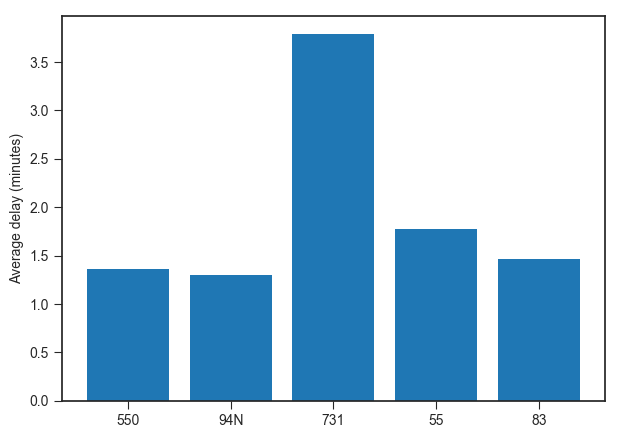

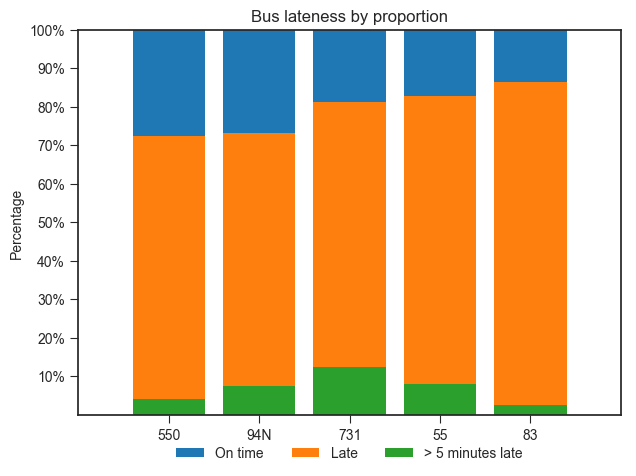

In [80]:
#plots!
#mean delay plot
plt.bar(range(5), stats.mean_delay / 60, align="center")
plt.xticks(np.arange(5), ('550', '94N', '731', '55', '83'))
plt.ylabel("Average delay (minutes)")
plt.show()

#percentage late/on time plot
plt.bar(range(5), stats.percentage_ontime, bottom=stats.percentage_late, align="center", label="On time")
plt.bar(range(5), stats.percentage_late, label="Late")
plt.bar(range(5), stats.percentage_really_late, label="> 5 minutes late")
plt.axis([-1,5,0,1])
plt.title("Bus lateness by proportion")
plt.xticks(np.arange(5), ('550', '94N', '731', '55', '83'))
plt.yticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1], ['10%', '20%', '30%', '40%', '50%', '60%', '70%','80%','90%','100%'])
plt.ylabel("Percentage")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),  shadow=True, ncol=3)
plt.show()

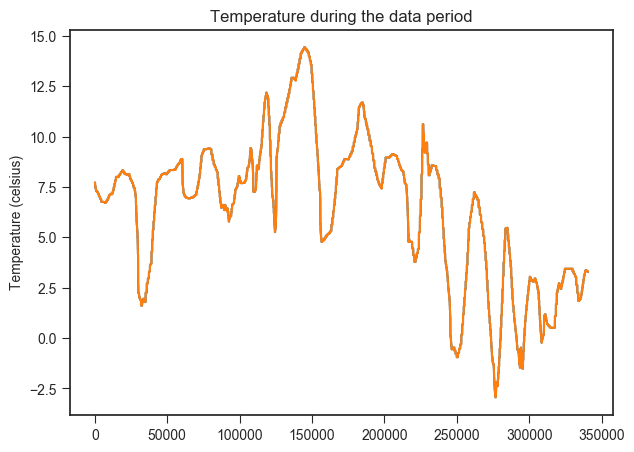

In [53]:
#weather stats
plt.plot(df.temperature)
plt.title("Temperature during the data period")
plt.ylabel("Temperature (celsius)")
plt.xticks()
plt.show()